In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
df = pd.read_csv("titanic survival.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis='columns',inplace=True)
df.head()


,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [106]:
 df.drop('Embarked',axis='columns')
target = df.Survived


In [107]:
dummies = pd.get_dummies(df.Sex)
dummies.head(3)


,female,male
0,0,1
1,1,0
2,1,0


In [108]:
df = pd.concat([df,dummies],axis='columns')
df.head(3)


,Survived,Pclass,Sex,Age,Fare,Embarked,female,male
0,0,3,male,22.0,7.2500,S,0,1
1,1,1,female,38.0,71.2833,C,1,0
2,1,3,female,26.0,7.9250,S,1,0


In [109]:
df.drop(['Sex','male'],axis='columns',inplace=True)
df.head(3)

,Survived,Pclass,Age,Fare,Embarked,female
0,0,3,22.0,7.2500,S,0
1,1,1,38.0,71.2833,C,1
2,1,3,26.0,7.9250,S,1


In [110]:
#to understand the data
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
Embarked      2
female        0
dtype: int64

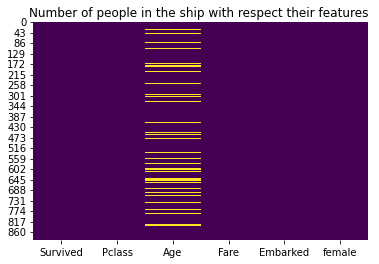

In [111]:
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Number of people in the ship with respect their features ')
plt.show()

In [112]:
df.columns[df.isna().any()]

Index(['Age', 'Embarked'], dtype='object')

In [113]:
df.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [114]:
df.Age = df.Age.fillna(df.Age.mean())
df.head()

,Survived,Pclass,Age,Fare,Embarked,female
0,0,3,22.0,7.2500,S,0
1,1,1,38.0,71.2833,C,1
2,1,3,26.0,7.9250,S,1
3,1,1,35.0,53.1000,S,1
4,0,3,35.0,8.0500,S,0


In [115]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [116]:
most_common = 'S'
df['Embarked'].fillna(most_common, inplace = True)

In [117]:
df['Embarked'].isnull().sum()

0

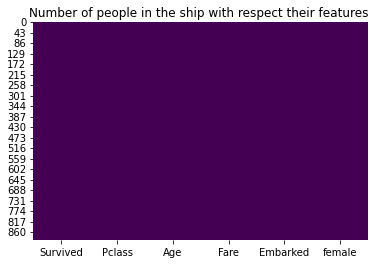

In [118]:
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Number of people in the ship with respect their features ')
plt.show()

In [119]:
#categorical data into numerical data

#gender = {'male': 0, 'female': 1}
#df['Sex'] = df['Sex'].map(gender)

#df.head()

In [120]:
#to understand the data
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
Embarked    0
female      0
dtype: int64

In [121]:

ports = {'S': 0, 'C': 1, 'Q': 2}
df['Embarked'] = df['Embarked'].map(ports)

df.head()

,Survived,Pclass,Age,Fare,Embarked,female
0,0,3,22.0,7.2500,0,0
1,1,1,38.0,71.2833,1,1
2,1,3,26.0,7.9250,0,1
3,1,1,35.0,53.1000,0,1
4,0,3,35.0,8.0500,0,0


In [122]:
from sklearn.model_selection import train_test_split



In [123]:
X =df.drop('Embarked', axis = 1)
y = df['Embarked']
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.33,random_state = 42)                            
X_train.shape

(596, 5)

In [124]:
#categorical data into numerical data

#gender = {'male': 0, 'female': 1}
#df['Sex'] = df['Sex'].map(gender)

In [125]:
X_train.head()

,Survived,Pclass,Age,Fare,female
6,0,1,54.000000,51.8625,0
718,0,3,29.699118,15.5000,0
685,0,2,25.000000,41.5792,0
73,0,3,26.000000,14.4542,0
882,0,3,22.000000,10.5167,1


In [126]:
y_train[:10]

/tmp/ipykernel_6357/891270224.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train[:10]


6      0
718    2
685    1
73     1
882    0
328    0
453    1
145    0
234    0
220    0
Name: Embarked, dtype: int64

In [127]:
X_train.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'female'], dtype='object')

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
#instantiate model
#random state allows to get the same results -for consistency

lr = LogisticRegression(random_state=42)


In [130]:
#fit the model

lr.fit(X_train,y_train)

/home/tanisha/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [131]:
lr.classes_

array([0, 1, 2])

In [132]:
lr.coef_

array([[-0.32327267, -0.15077562,  0.0029296 ,  0.01029298, -0.1540059 ],
       [ 0.69491388, -0.28708412,  0.00128443,  0.01633298, -0.46426873],
       [-0.37164121,  0.43785973, -0.00421403, -0.02662596,  0.61827462]])

In [134]:
lr.intercept_

array([ 1.58842973, -0.10439149, -1.48403824])

In [135]:
#convert logarithm odd nos to regular no
import numpy as np

In [136]:
lr.coef_[0]

array([-0.32327267, -0.15077562,  0.0029296 ,  0.01029298, -0.1540059 ])

In [139]:
odd_class_0 = np.exp(lr.coef_[0])
odd_class_0
#each cell %tage belong to each class

array([0.72377647, 0.86004066, 1.0029339 , 1.01034613, 0.85726697])

In [140]:
coeff = lr.coef_
columns = X_train.columns

In [147]:
import pandas as pd
import matplotlib
from matplotlib.pyplot import plot
%matplotlib inline

#for class value 0
coefficients =pd.Series(coeff[0],columns)
coefficients

Survived   -0.323273
Pclass     -0.150776
Age         0.002930
Fare        0.010293
female     -0.154006
dtype: float64

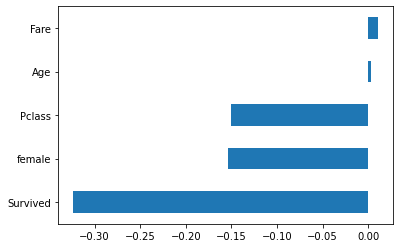

In [148]:
coefficients.sort_values().plot(kind='barh');
#to plot the lograthmic values of each class

In [151]:
coefficients =pd.Series(odd_class_0,columns)

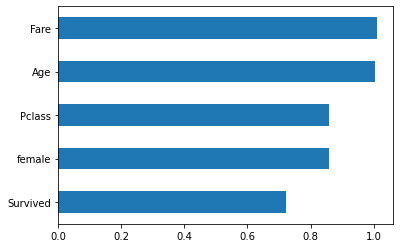

In [152]:
coefficients.sort_values().plot(kind='barh');
#%tage chance fare affects the target

In [149]:
#for class value 1
coefficients =pd.Series(coeff[1],columns)
coefficients

Survived    0.694914
Pclass     -0.287084
Age         0.001284
Fare        0.016333
female     -0.464269
dtype: float64

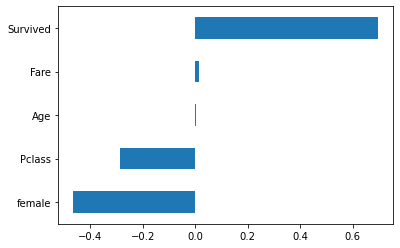

In [150]:
coefficients.sort_values().plot(kind='barh');